In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)
sns.set(style="whitegrid")

In [24]:
df = pd.read_csv('Suicides in India 2001-2012.csv')

df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [26]:
# Show the first 5 rows
print("🔍 Preview of the dataset:")
display(df.head())

🔍 Preview of the dataset:


,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [28]:
# Shape of the dataset
print(f"\n📐 Shape of dataset: {df.shape}")


📐 Shape of dataset: (237519, 7)


In [30]:
# Info on columns and data types
print("\n🧾 Dataset Info:")
df.info()


🧾 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [34]:
# Check for missing values
print("\n🔍 Missing Values:")
print(df.isnull().sum())


🔍 Missing Values:
State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64


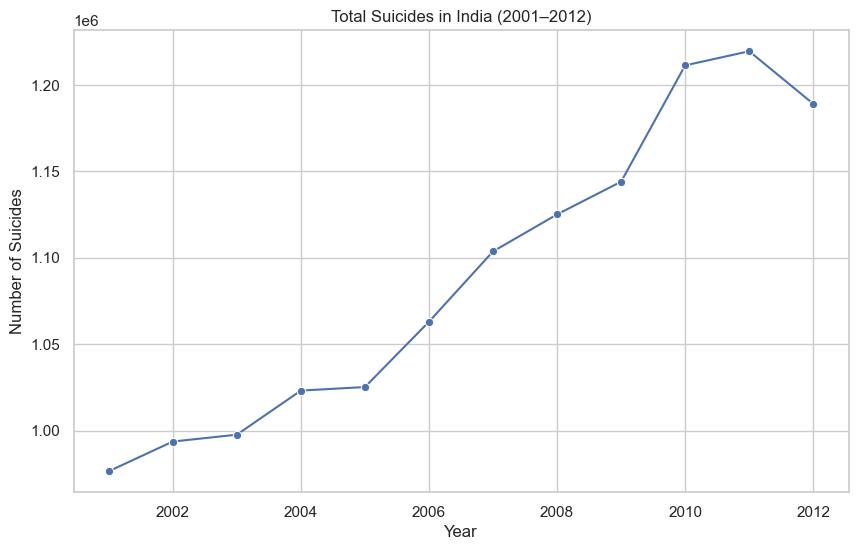

In [41]:
# 1. Suicides by Year:
df_year = df.groupby('Year')['Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_year, x='Year', y='Total', marker='o')
plt.title('Total Suicides in India (2001–2012)')
plt.ylabel('Number of Suicides')
plt.xlabel('Year')
plt.grid(True)
plt.show()

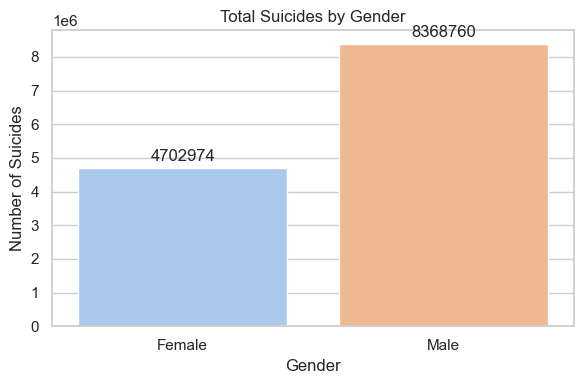

In [47]:
# 2. Suicides by Gender:
df_gender = df.groupby('Gender')['Total'].sum().reset_index()

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=df_gender, x='Gender', y='Total',hue='Gender', palette='pastel')
plt.title('Total Suicides by Gender')
plt.ylabel('Number of Suicides')
plt.xlabel('Gender')

# Labels on each bar
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

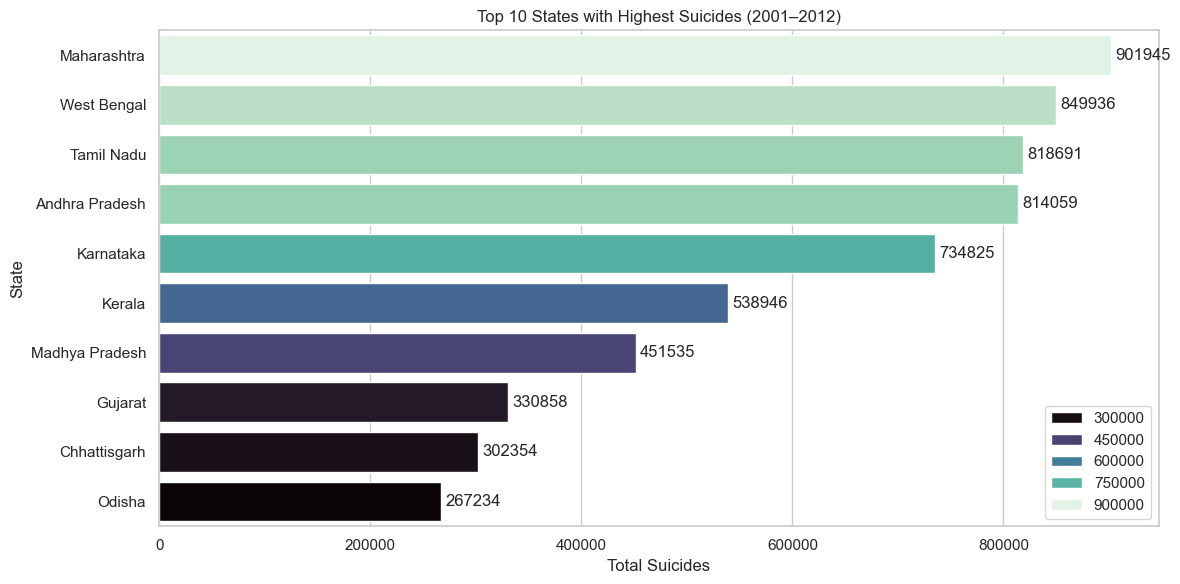

In [53]:
# 3. Suicides by State (Top 10):
df_state = df.groupby('State')['Total'].sum().sort_values(ascending=False).iloc[2:12]

plt.figure(figsize=(12, 6))
ax=sns.barplot(x=df_state.values, y=df_state.index, hue=df_state.values, palette='mako')
plt.title('Top 10 States with Highest Suicides (2001–2012)')
plt.xlabel('Total Suicides')
plt.ylabel('State')

# Labels
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f',padding=3)

plt.tight_layout()
plt.show()

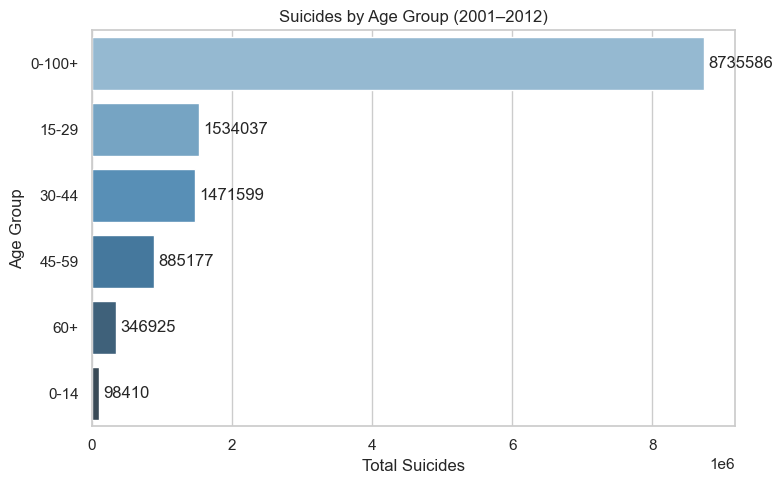

In [61]:
# Distribution of Suicides by Age Group
df_age = df.groupby('Age_group')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=df_age, x='Total', y='Age_group',hue='Age_group', palette='Blues_d')
plt.title('Suicides by Age Group (2001–2012)')
plt.xlabel('Total Suicides')
plt.ylabel('Age Group')

# Add labels
for i in plt.gca().containers:
    plt.gca().bar_label(i, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

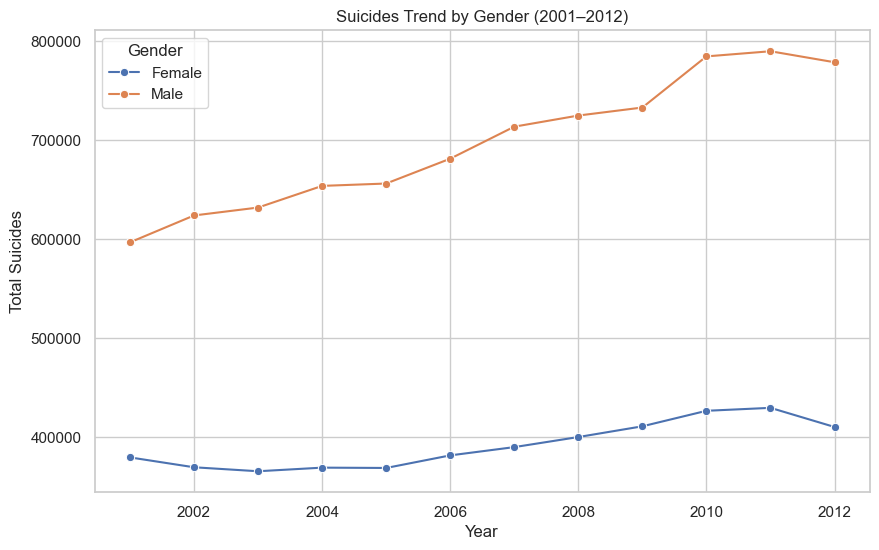

In [65]:
# Year vs Gender Trend
df_gender_year = df.groupby(['Year', 'Gender'])['Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_gender_year, x='Year', y='Total', hue='Gender', marker='o')
plt.title('Suicides Trend by Gender (2001–2012)')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.grid(True)
plt.show()

In [67]:
# 1. Create Age Category Bins
age_mapping = {
    '0-14': 'Child',
    '15-29': 'Youth',
    '30-44': 'Adult',
    '45-59': 'Middle Age',
    '60+': 'Senior',
    '0-100+': 'Unknown'
}
df['Age_Category'] = df['Age_group'].map(age_mapping)

In [69]:
df['State'].unique()


array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [71]:
# 2. Add Region Information
region_map = {
    'Jammu & Kashmir': 'North', 'Himachal Pradesh': 'North', 'Punjab': 'North',
    'Chandigarh': 'North', 'Uttarakhand': 'North', 'Haryana': 'North', 'Delhi (Ut)': 'North',
    'Rajasthan': 'North', 'Uttar Pradesh': 'North',
    
    'Bihar': 'East', 'Jharkhand': 'East', 'Odisha': 'East', 'West Bengal': 'East',
    
    'Andra Pradesh': 'South', 'Karnataka': 'South',
    'Kerala': 'South', 'Tamil Nadu': 'South', 'Puducherry': 'South', 'Lakshadweep': 'South',
    
    'Goa': 'West', 'Gujarat': 'West', 'Maharashtra': 'West', 'Daman & Diu': 'West',
    'D & N Haveli': 'West',
    
    'Madhya Pradesh': 'Central', 'Chhattisgarh': 'Central',
    
    'Arunachal Pradesh': 'North-East', 'Assam': 'North-East', 'Manipur': 'North-East',
    'Meghalaya': 'North-East', 'Mizoram': 'North-East', 'Nagaland': 'North-East', 'Sikkim': 'North-East'
}

df['Region'] = df['State'].map(region_map)


In [73]:
# Suicide percentage by group (gender or state)
df_gender_total = df.groupby('Gender')['Total'].transform('sum')
df['Gender_Suicide_Pct'] = df['Total'] / df_gender_total

In [75]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)


In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Total_scaled']] = scaler.fit_transform(df[['Total']])


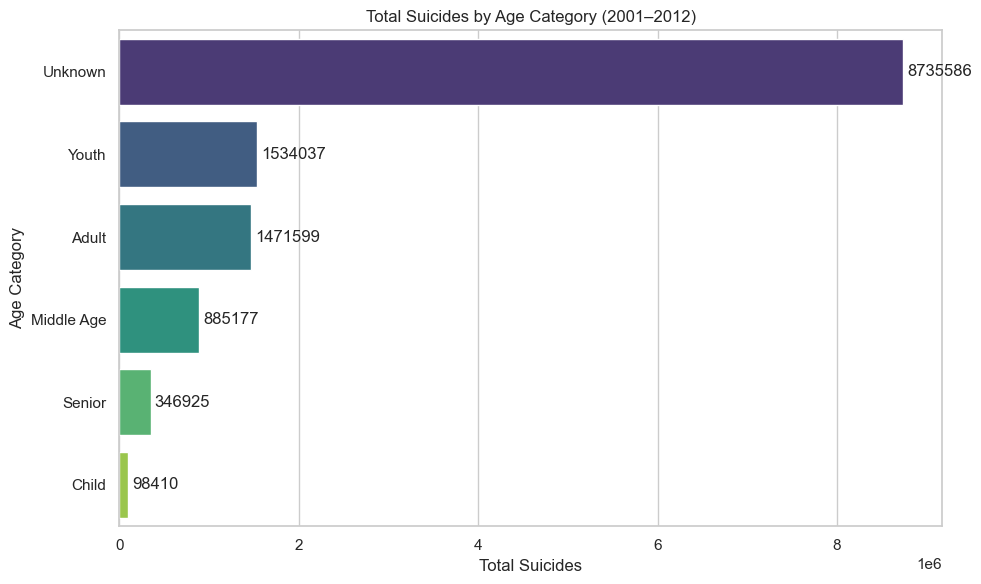

In [108]:
# Group by new Age_Category and sum suicides
df_age_cat = df.groupby('Age_Category')['Total'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=df_age_cat.values, y=df_age_cat.index, hue=df_age_cat.index, palette='viridis')
plt.title('Total Suicides by Age Category (2001–2012)')
plt.xlabel('Total Suicides')
plt.ylabel('Age Category')

for i in plt.gca().containers:
    plt.gca().bar_label(i, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

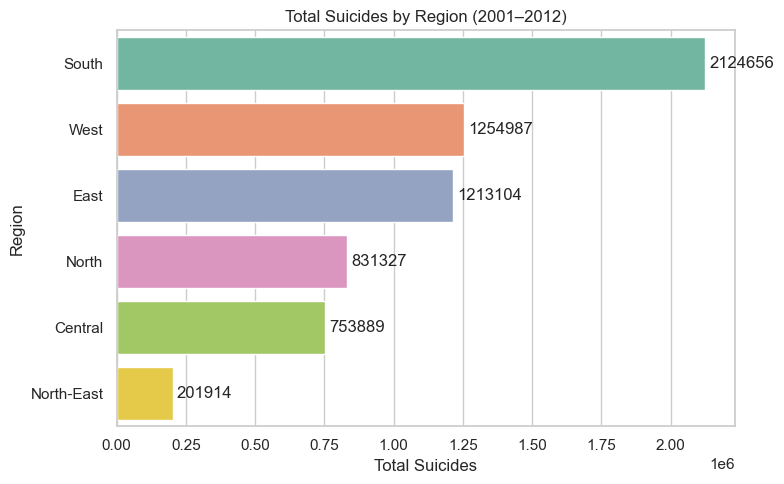

In [122]:
# Group by Region and sum suicides
df_region = df.groupby('Region')['Total'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
ax=sns.barplot(x=df_region.values, y=df_region.index,hue =df_region.index, palette='Set2')
plt.title('Total Suicides by Region (2001–2012)')
plt.xlabel('Total Suicides')
plt.ylabel('Region')
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f',padding=3)

plt.tight_layout()
plt.show()

In [131]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total,Age_Category,Region,Gender_Suicide_Pct,Total_scaled
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0,Child,NaN,0.0,0.0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0,Child,NaN,0.0,0.0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0,Child,NaN,0.0,0.0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0,Child,NaN,0.0,0.0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0,Child,NaN,0.0,0.0


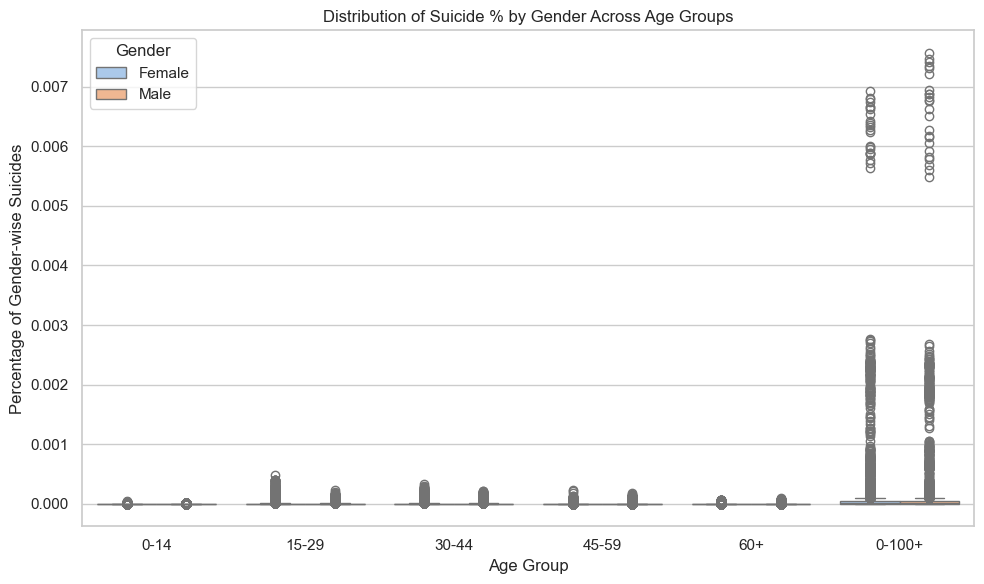

In [135]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age_group', y='Gender_Suicide_Pct', hue='Gender', palette='pastel')
plt.title('Distribution of Suicide % by Gender Across Age Groups')
plt.ylabel('Percentage of Gender-wise Suicides')
plt.xlabel('Age Group')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

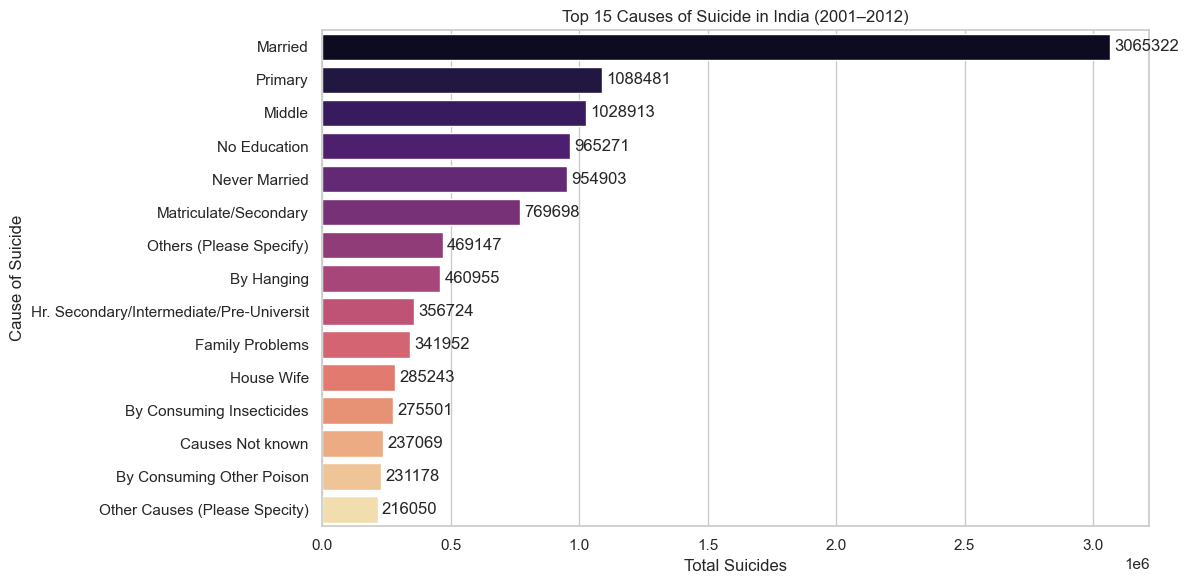

In [145]:
# Suicides by Cause
df_cause = df.groupby('Type')['Total'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_cause.values, y=df_cause.index,hue=df_cause.index, palette='magma')
plt.title('Top 15 Causes of Suicide in India (2001–2012)')
plt.xlabel('Total Suicides')
plt.ylabel('Cause of Suicide')
for i in plt.gca().containers:
    plt.gca().bar_label(i, fmt='%.0f', padding=3)
plt.tight_layout()
plt.show()

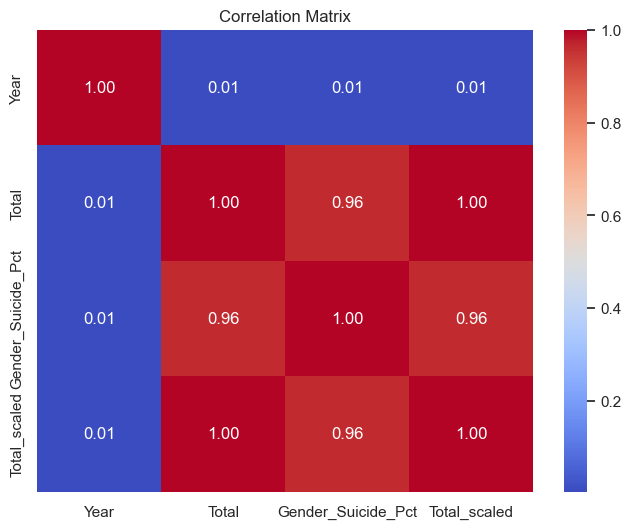

In [151]:
# Exclude non-numeric columns from the dataframe
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [157]:
total_suicides = df['Total'].sum()
print(f"Total number of suicides: {total_suicides}")

Total number of suicides: 13071734


In [159]:
total_suicides_gender = df.groupby('Gender')['Total'].sum()
print(total_suicides_gender)

Gender
Female    4702974
Male      8368760
Name: Total, dtype: int64
